In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-darkgrid')
import datetime as dt

In [2]:
citibike_feb = pd.read_csv("D:/PhotonUser/My Files/Temporary Files/2014-02 - Citi Bike trip data.csv")

In [3]:
citibike_feb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [4]:
#remember trip duration = Trip Duration (seconds)
#User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
#Gender (Zero=unknown; 1=male; 2=female)

In [5]:
#check data types
citibike_feb.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

### Task 2. Calculate Min,  Max and Average trip time. Print the Results

In [6]:
#def a function to convert int to time format
def conv_time_format(value): 
    print(str(pd.Timedelta(value,unit='s')))

In [7]:
#min trip time
mintriptime =citibike_feb['tripduration'].min()
print('min trip time is') 
conv_time_format(mintriptime)


min trip time is
0 days 00:01:00


In [8]:
#max trip time
maxtriptime = citibike_feb['tripduration'].max()
print('max trip time is ')
conv_time_format(maxtriptime)

max trip time is 
8 days 20:48:28


In [9]:
#averagetriptime
averagetriptime = citibike_feb['tripduration'].mean()
print('average trip time is ')
conv_time_format(averagetriptime)

average trip time is 
0 days 00:14:34.519809


### Task 3. Calculate ridesrship over the period of a month broken fown by rider gender (male/female) and rider type (subscriber-tourist). Vizualise the results 

In [10]:
#let's confirm user type is what we need 
citibike_feb['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [11]:
#let's rename the gender to be less confusing now, define a new df to preserve original -
citibike_feb_gender = citibike_feb

In [12]:
#unknown first - 0 to unknown
citibike_feb_gender['gender'] = citibike_feb['gender'].replace([0],'unknown')

In [13]:
#rename 1 to male
citibike_feb_gender['gender'] = citibike_feb['gender'].replace([1],'Male')

In [14]:
#rename 2 to female
citibike_feb_gender['gender'] = citibike_feb['gender'].replace([2],'Female')

In [15]:
#check it 
citibike_feb_gender.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,Male
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,Female
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,Female
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,Male
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,Male


In [16]:
#gender df define
citibike_feb_gender_totals = citibike_feb_gender[['gender','bikeid']].groupby(by='gender').count()

In [17]:
#gender df result
gender_totals = citibike_feb_gender_totals['bikeid'].values

In [18]:
#usertype df define
citibike_feb_usertype_total = citibike_feb_gender[['usertype','bikeid']].groupby(by = 'usertype').count()

In [19]:
#usertype df result
citibike_feb_usertype_total

,bikeid
usertype,
Customer,6717
Subscriber,218019


In [20]:
#define user type values
usertypevalues = citibike_feb_usertype_total['bikeid'].values

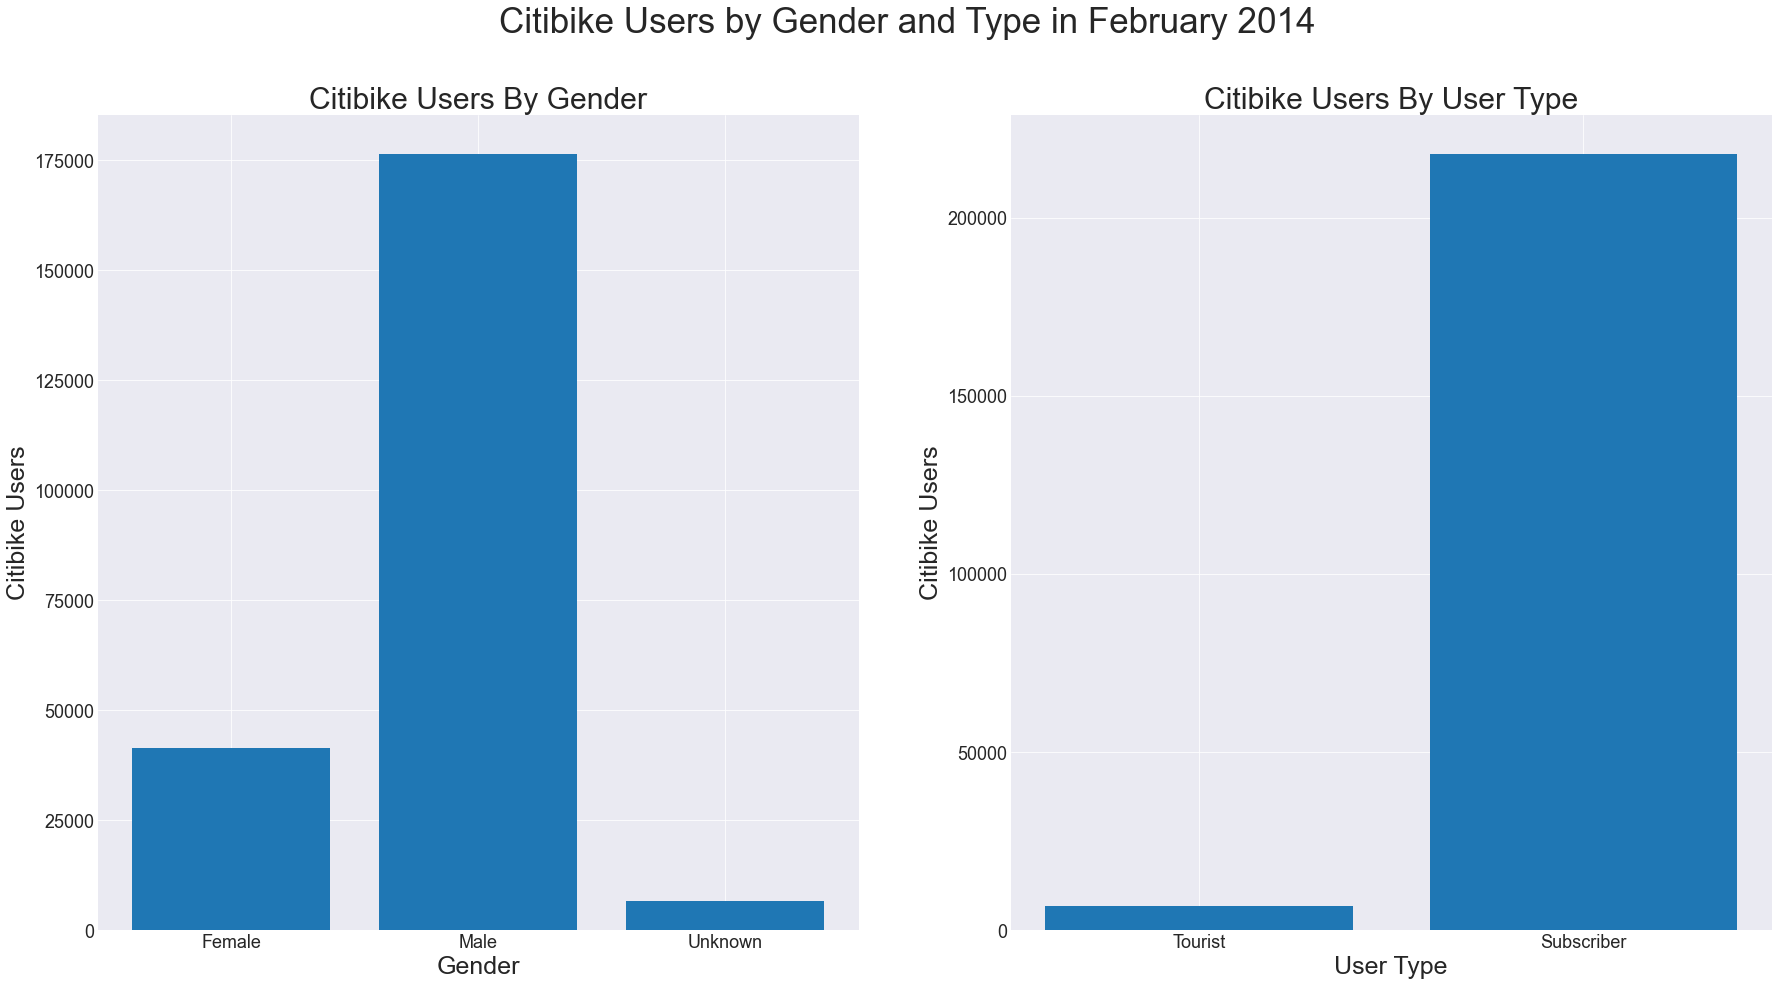

In [21]:
#plot
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
fig1.suptitle ('Citibike Users by Gender and Type in February 2014', fontsize=35)

x = ['Female', 'Male', 'Unknown']
y = gender_totals
ax1.bar(x,y)
ax1.set_title('Citibike Users By Gender', fontsize = 30)
ax1.set_xlabel('Gender', fontsize=25)
ax1.set_ylabel('Citibike Users', fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

a = ['Tourist', 'Subscriber']
b = usertypevalues
ax2.bar(a,b)
ax2.set_title('Citibike Users By User Type', fontsize = 30)
ax2.set_xlabel('User Type', fontsize=25)
ax2.set_ylabel('Citibike Users', fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

### Task 4. Calculate avg ridership over each hour of day over the selected month broken down by rider gender and rider type 

In [22]:
#avg ridership over each hour of the day b
#first convert times to date time format
citibike_feb['starttime'] = pd.to_datetime(citibike_feb['starttime'])
citibike_feb['stoptime'] = pd.to_datetime(citibike_feb['stoptime'])
#do it for the gender version too for convinience
citibike_feb_gender['starttime'] = pd.to_datetime(citibike_feb['starttime'])
citibike_feb_gender['stoptime'] = pd.to_datetime(citibike_feb['stoptime'])


In [23]:
#check data types
citibike_feb_gender.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                             object
dtype: object

In [24]:
#define hour as date time
citibike_feb_gender['hour'] = citibike_feb_gender['starttime'].dt.hour

In [25]:
#reprint df
citibike_feb_gender

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,hour
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,Male,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,Female,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,Female,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,Male,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224731,848,2014-02-28 23:57:13,2014-03-01 00:11:21,498,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,17413,Subscriber,1976,Male,23
224732,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,470,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,15608,Subscriber,1985,Female,23
224733,304,2014-02-28 23:58:17,2014-03-01 00:03:21,497,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,17112,Subscriber,1968,Male,23
224734,308,2014-02-28 23:59:10,2014-03-01 00:04:18,353,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,14761,Subscriber,1982,Male,23


In [26]:
#define df for gender and user type
citibike_hour_gender = citibike_feb_gender[['hour','gender']].groupby(by='hour')

In [27]:
#get gender values
hourgender = citibike_hour_gender['gender'].value_counts()

In [28]:
#convert back to frame
hourgenderdf = hourgender.to_frame()

In [29]:
#display
hourgenderdf

gender
hour gender         
0    Male       1764
     Female      328
     unknown      29
1    Male        986
     Female      168
...              ...
22   Female      938
     unknown     127
23   Male       2873
     Female      622
     unknown      74

[72 rows x 1 columns]

In [30]:
#reset index
hourgenderdf.reset_index(level=0, inplace=True)

In [31]:
#rename columns 
hourgenderdf.columns = ['hour','gender_counts']

In [32]:
#reset index result 
hourgenderdf

,hour,gender_counts
gender,,
Male,0,1764
Female,0,328
unknown,0,29
Male,1,986
Female,1,168
...,...,...
Female,22,938
unknown,22,127
Male,23,2873


In [33]:
hourgenderdf.reset_index(level=0, inplace=True)

In [34]:
#divide gender counts by 28 to get average ridership average ridership for each hour of the day for the entire month 
#(so average ridership for gender 1, rider type 1 at 1 am,)- we don't want counts, we want avg! use avg number
hourgenderdf['gender_avg'] =  (hourgenderdf['gender_counts'] / 28)
hourgenderdf

,gender,hour,gender_counts,gender_avg
0,Male,0,1764,63.000000
1,Female,0,328,11.714286
2,unknown,0,29,1.035714
3,Male,1,986,35.214286
4,Female,1,168,6.000000
...,...,...,...,...
67,Female,22,938,33.500000
68,unknown,22,127,4.535714
69,Male,23,2873,102.607143
70,Female,23,622,22.214286


In [35]:
#get male riders per hour per day
malegenderdf = hourgenderdf[(hourgenderdf['gender'] == 'Male')]
malehourvalues = malegenderdf['gender_avg'].values
malehourvalues

array([ 63.        ,  35.21428571,  24.46428571,  14.03571429,
        13.85714286,  35.53571429, 130.92857143, 261.64285714,
       478.57142857, 401.60714286, 273.17857143, 273.28571429,
       332.21428571, 358.17857143, 376.75      , 393.85714286,
       472.14285714, 638.03571429, 584.10714286, 406.64285714,
       275.39285714, 195.64285714, 163.60714286, 102.60714286])

In [36]:
#get female riders per hour per day
femalegenderdf = hourgenderdf[(hourgenderdf['gender'] == 'Female')]
femalehourvalues = femalegenderdf['gender_avg'].values
femalehourvalues

array([ 11.71428571,   6.        ,   2.96428571,   1.42857143,
         2.21428571,   7.17857143,  18.71428571,  47.17857143,
       108.25      , 100.96428571,  76.71428571,  80.92857143,
        92.10714286, 105.64285714, 105.46428571, 104.28571429,
       109.85714286, 139.42857143, 120.64285714,  86.78571429,
        54.82142857,  42.39285714,  33.5       ,  22.21428571])

In [37]:
#get unknown riders per hour per day
unknowngenderdf = hourgenderdf[(hourgenderdf['gender'] == 'unknown')]
unknownhourvalues = unknowngenderdf['gender_avg'].values
unknownhourvalues

array([ 1.03571429,  0.96428571,  0.89285714,  0.60714286,  0.42857143,
        0.21428571,  0.5       ,  2.07142857,  4.07142857,  7.5       ,
       10.75      , 13.89285714, 20.10714286, 23.78571429, 32.07142857,
       33.17857143, 28.71428571, 22.85714286, 11.35714286,  8.21428571,
        5.67857143,  4.32142857,  4.53571429,  2.64285714])

In [38]:
#set this as an index
hourindex = hourgenderdf['hour'].values

In [39]:
#keep only uniques
hourindex = np.unique(hourindex)

In [40]:
#get the index
hourindex

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [41]:
#do the same what you did for gender for user type
citibike_hour_usertype = citibike_feb_gender[['hour','usertype']].groupby(by='hour')
houruser = citibike_hour_usertype['usertype'].value_counts()
houruserdf = houruser.to_frame()
houruserdf.reset_index(level=0, inplace=True)
houruserdf.columns = ['hour','usertype_counts']
houruserdf.reset_index(level=0, inplace=True)

In [42]:
#get user type avg and check
houruserdf['user_avg'] =  (houruserdf['usertype_counts'] / 28)
houruserdf.head()

,usertype,hour,usertype_counts,user_avg
0,Subscriber,0,2092,74.714286
1,Customer,0,29,1.035714
2,Subscriber,1,1154,41.214286
3,Customer,1,27,0.964286
4,Subscriber,2,768,27.428571


In [43]:
#calcualate average customers per hour 
customerdf = houruserdf[(houruserdf['usertype'] == 'Customer')]
customervalues = customerdf['user_avg'].values
customervalues

array([ 1.03571429,  0.96428571,  0.89285714,  0.60714286,  0.42857143,
        0.21428571,  0.5       ,  1.82142857,  4.07142857,  7.5       ,
       10.75      , 13.85714286, 20.03571429, 23.75      , 32.07142857,
       33.17857143, 28.67857143, 22.85714286, 11.28571429,  8.21428571,
        5.67857143,  4.32142857,  4.53571429,  2.64285714])

In [44]:
#calcualate average subscribers per hour 
subscriberdf = houruserdf[(houruserdf['usertype'] == 'Subscriber')]
subscribervalues = subscriberdf['user_avg'].values
subscribervalues

array([ 74.71428571,  41.21428571,  27.42857143,  15.46428571,
        16.07142857,  42.71428571, 149.64285714, 309.07142857,
       586.82142857, 502.57142857, 349.89285714, 354.25      ,
       424.39285714, 463.85714286, 482.21428571, 498.14285714,
       582.03571429, 777.46428571, 704.82142857, 493.42857143,
       330.21428571, 238.03571429, 197.10714286, 124.82142857])

In [45]:
import matplotlib.patches as mpatches

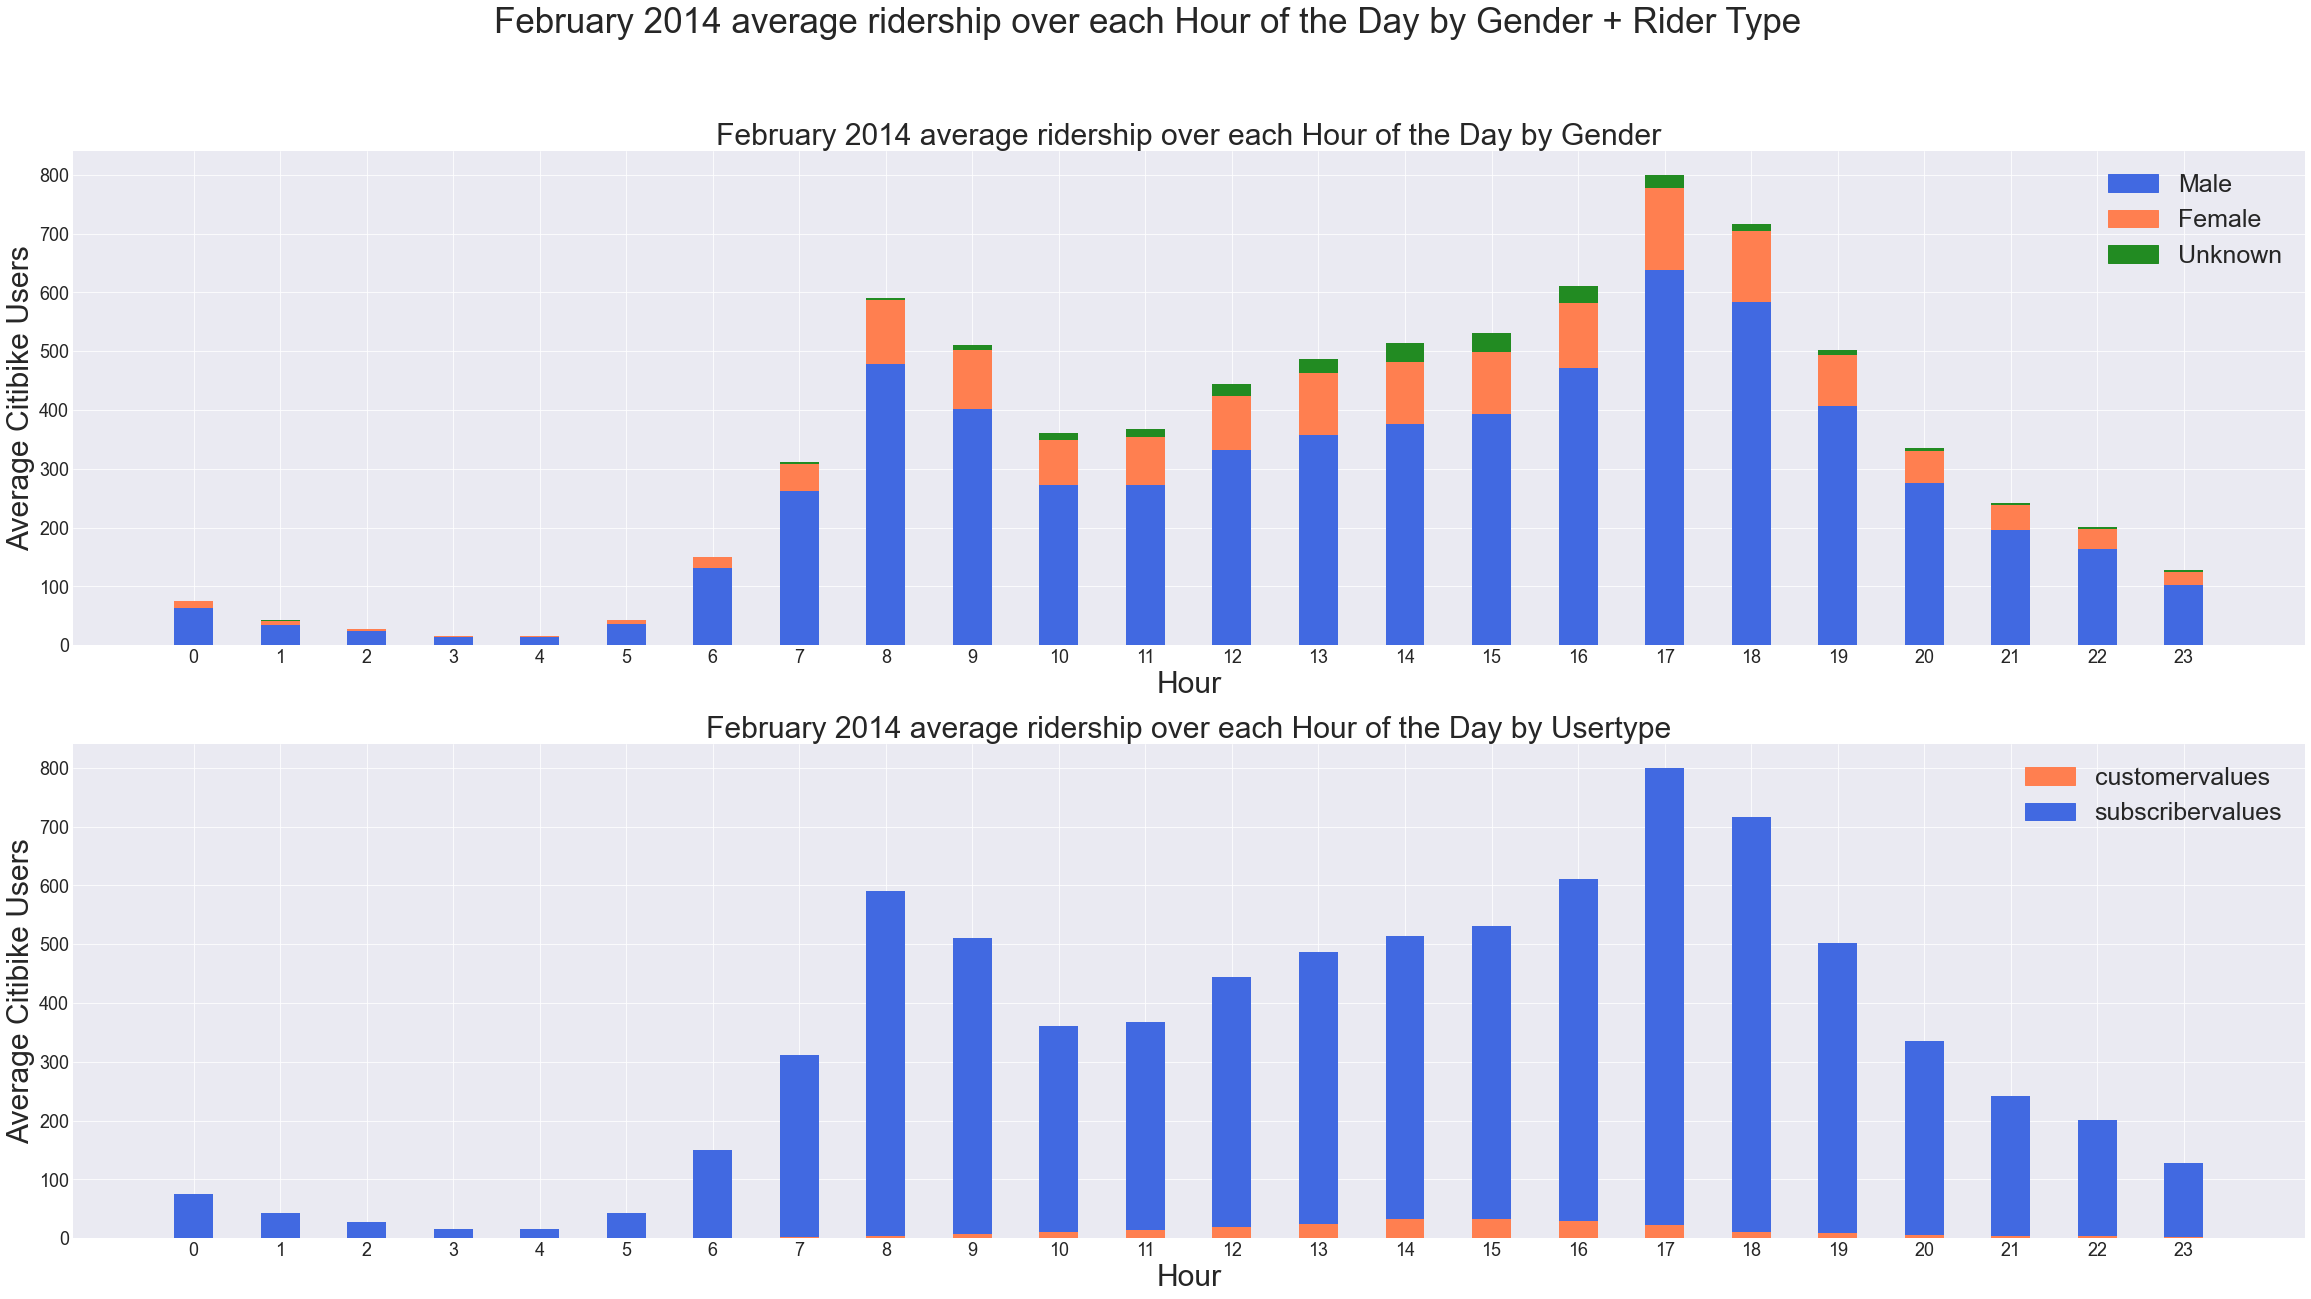

In [46]:
#plot it
fig1, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(40,20))
fig1.suptitle ('February 2014 average ridership over each Hour of the Day by Gender + Rider Type ', fontsize=35)

ind = hourindex  # use hour index
width = 0.45     # the width of the bars

ax1.set_title('February 2014 average ridership over each Hour of the Day by Gender', fontsize = 30)
ax1.bar(ind, malehourvalues, width, color = 'royalblue' )
ax1.bar(ind, femalehourvalues, width, bottom=malehourvalues,color = 'coral')
ax1.bar(ind, unknownhourvalues, width, bottom = malehourvalues + femalehourvalues,color='forestgreen')

blue_patch = mpatches.Patch(color='royalblue', label='Male')
orange_patch = mpatches.Patch(color='coral', label='Female')
green_patch = mpatches.Patch(color='forestgreen', label='Unknown')

ax1.set_xlabel('Hour', fontsize=30)
ax1.set_ylabel('Average Citibike Users', fontsize=30)

ax1.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=25)

ax1.set_xticks(hourindex[:])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

ax2.set_title('February 2014 average ridership over each Hour of the Day by Usertype', fontsize = 30)
ax2.bar(ind, customervalues, width, color='coral')
ax2.bar(ind, subscribervalues, width, bottom=customervalues, color='royalblue')

orange_patch2 = mpatches.Patch(color='royalblue', label='subscribervalues')
blue_patch2 = mpatches.Patch(color='coral', label='customervalues')

ax2.set_xlabel('Hour', fontsize=30)
ax2.set_ylabel('Average Citibike Users', fontsize=30)

ax2.legend(handles=[blue_patch2,orange_patch2],fontsize=25)

ax2.set_xticks(hourindex[:])
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

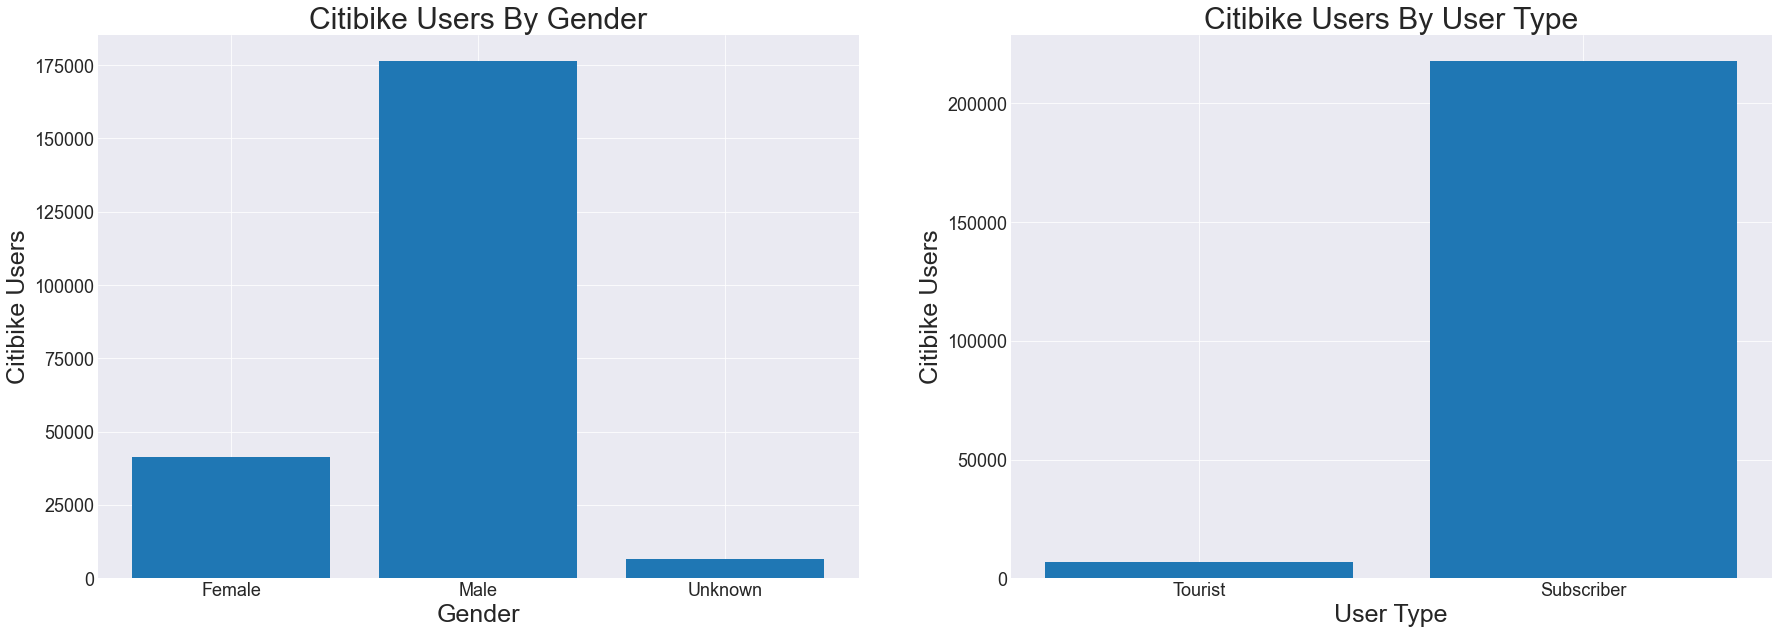

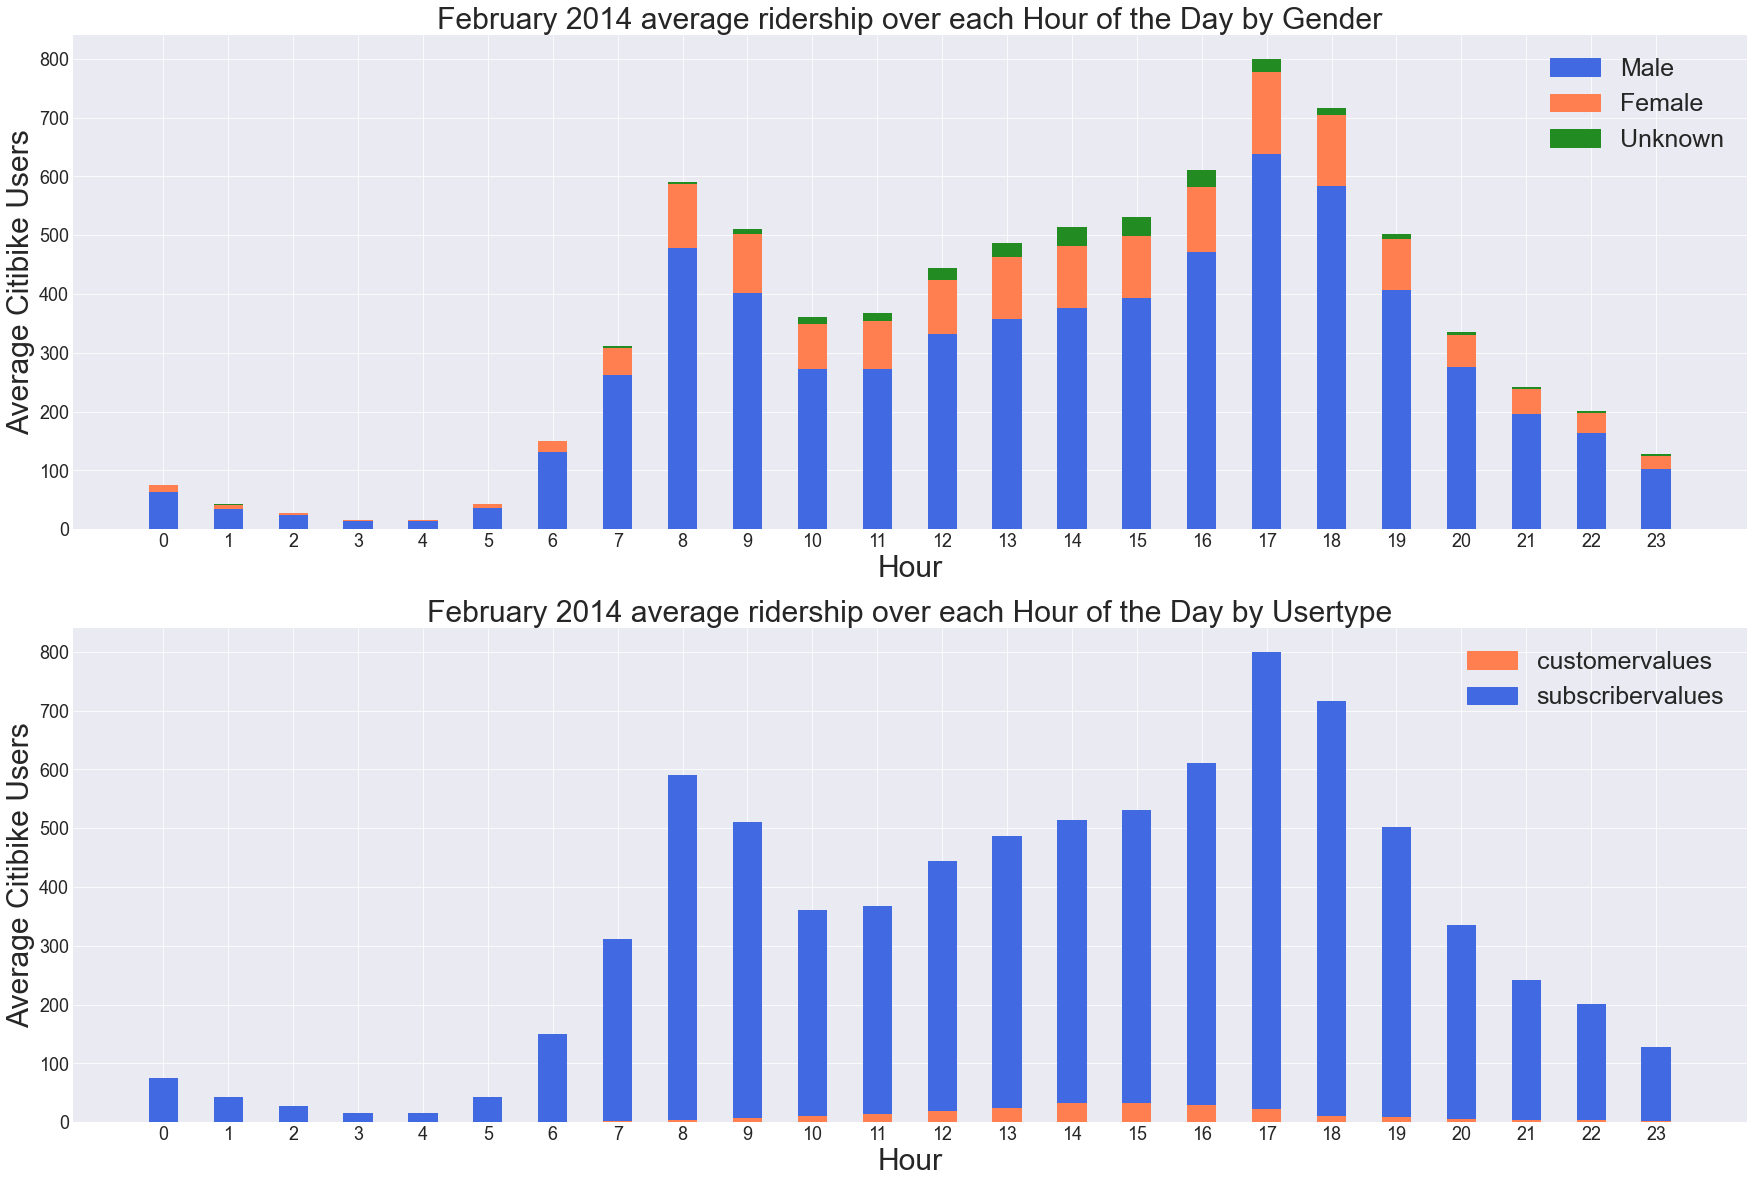

In [47]:
#plot all graphs on one canvas
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
fig2,  (ax3,ax4) = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
x = ['Female', 'Male', 'Unknown']
y = gender_totals
ax1.bar(x,y)
ax1.set_title('Citibike Users By Gender', fontsize = 30)
ax1.set_xlabel('Gender', fontsize=25)
ax1.set_ylabel('Citibike Users', fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

a = ['Tourist', 'Subscriber']
b = usertypevalues
ax2.bar(a,b)
ax2.set_title('Citibike Users By User Type', fontsize = 30)
ax2.set_xlabel('User Type', fontsize=25)
ax2.set_ylabel('Citibike Users', fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

#fig1, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(40,25))
#fig1.suptitle ('February 2014 average ridership over each Hour of the Day by Gender + Rider Type ', fontsize=35)

ind = hourindex  # use hour index
width = 0.45     # the width of the bars

ax3.set_title('February 2014 average ridership over each Hour of the Day by Gender', fontsize = 30)
ax3.bar(ind, malehourvalues, width, color = 'royalblue' )
ax3.bar(ind, femalehourvalues, width, bottom=malehourvalues,color = 'coral')
ax3.bar(ind, unknownhourvalues, width, bottom = malehourvalues + femalehourvalues,color='forestgreen')

blue_patch = mpatches.Patch(color='royalblue', label='Male')
orange_patch = mpatches.Patch(color='coral', label='Female')
green_patch = mpatches.Patch(color='forestgreen', label='Unknown')

ax3.set_xlabel('Hour', fontsize=30)
ax3.set_ylabel('Average Citibike Users', fontsize=30)

ax3.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=25)

ax3.set_xticks(hourindex[:])
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='minor', labelsize=18)

ax4.set_title('February 2014 average ridership over each Hour of the Day by Usertype', fontsize = 30)
ax4.bar(ind, customervalues, width, color='coral')
ax4.bar(ind, subscribervalues, width, bottom=customervalues, color='royalblue')

orange_patch2 = mpatches.Patch(color='royalblue', label='subscribervalues')
blue_patch2 = mpatches.Patch(color='coral', label='customervalues')

ax4.set_xlabel('Hour', fontsize=30)
ax4.set_ylabel('Average Citibike Users', fontsize=30)

ax4.legend(handles=[blue_patch2,orange_patch2],fontsize=25)

ax4.set_xticks(hourindex[:])
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.tick_params(axis='both', which='minor', labelsize=18)

## Task 5. 40 pts. – Suggest and complete an additional descriptive analysis of the CitiBike data
### (please use only the data provided).


### a. 10 pts. - Write the research question you are attempting to answer. Explain why it is interesting, or why we would want to study this question

Research Question : How does difference in age play a role in citibike data? See if it factors into trip durations, overall trips for citibike users. 

Rational: 

I think we all have biases and a common stereotype is that younger people are generally more active than older people. I mainly want to explore this age data to: 
1)See if age plays a role in citibike usage 
2)See overall member numbers for each age group, and trip duration per each age group. 

This would provide valuable context into how frequently people of different ages use this sevice, which age groups is benefiting it from the most and provide context into the citibike system to which ages to focus on growing thier membership.

### b. 10 pts. - List the specific data that you will need to get or generate to do this analysis, the steps you will take in this analysis, and how you will visualize your results

1.In order to answer this question I will need to define a dataset with 3 main data variables: The age, trip duration and the count of rides. I will use birth year from the current citibike dataset to calculate age. 
2.I will then group by the ages, aggregating the trip duration using a sum function and overall trips using a count function. After this step I will try to find a good way to divide the ages with a reasonable sample size for each age group. 
3.Once this is complete I will sum the overall trips and trip duration time. To find average trip duration I will divide the overall trip duration for each age group by the number of trips. 
4.I will then vizualise these statistics for each age group. For trip counts I will use a bar plot and average trip duration I will use a line plot. 


(Caveat to Analysis: I will not be performing normalization based on NYC population here, but this is a viable next step to explore citibike data more in depth)


### c. 10 pts. – Implement these steps in python, printing out any intermediate calculations you may do.

In [48]:
#define a df keep bike id for count
citibike_age= citibike_feb[['birth year','tripduration','bikeid']]

In [49]:
#define columns
citibike_age.columns = ['birthyear','tripduration','bikeid']

In [50]:
#citibike_age2.columns = ['birthyear','tripduration','gender','bikeid']

In [51]:
citibike_age['birthyear'] = pd.to_datetime(citibike_age.birthyear, format="%Y", errors = 'coerce')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
citibike_age.dtypes

birthyear       datetime64[ns]
tripduration             int64
bikeid                   int64
dtype: object

In [53]:
citibike_age['birthyear'] = pd.DatetimeIndex(citibike_age['birthyear']).year 

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
citibike_age.dropna
citibike_age['age'] = (2014 - citibike_age['birthyear'])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
citibike_age

,birthyear,tripduration,bikeid,age
0,1991.0,382,21101,23.0
1,1979.0,372,15456,35.0
2,1948.0,591,16281,66.0
3,1981.0,583,17400,33.0
4,1990.0,223,19341,24.0
...,...,...,...,...
224731,1976.0,848,17413,38.0
224732,1985.0,1355,15608,29.0
224733,1968.0,304,17112,46.0
224734,1982.0,308,14761,32.0


In [56]:
citibike_age.dtypes

birthyear       float64
tripduration      int64
bikeid            int64
age             float64
dtype: object

In [57]:
#not sure if 115 is valid let's see how many age values are over 90
citibike_age.describe()

,birthyear,tripduration,bikeid,age
count,218019.000000,224736.000000,224736.000000,218019.000000
mean,1975.497507,874.519810,18010.598222,38.502493
std,11.423985,5486.092219,1987.769335,11.423985
min,1899.000000,60.000000,14529.000000,17.000000
25%,1968.000000,360.000000,16302.000000,29.000000
50%,1978.000000,544.000000,17975.000000,36.000000
75%,1985.000000,845.000000,19689.000000,46.000000
max,1997.000000,766108.000000,21542.000000,115.000000


In [58]:
#only 134, pretty low - let's try to get a better sample to include older range 
citibike_age[(citibike_age['age']>90)].count()

birthyear       134
tripduration    134
bikeid          134
age             134
dtype: int64

In [59]:
#70 is stil very little, under 1,00 users 
citibike_age[(citibike_age['age']>70)].count()


birthyear       927
tripduration    927
bikeid          927
age             927
dtype: int64

In [60]:
#65 is significantly more 
citibike_age[(citibike_age['age']>65)].count()


birthyear       3164
tripduration    3164
bikeid          3164
age             3164
dtype: int64

In [61]:
#check it
citibike_age

,birthyear,tripduration,bikeid,age
0,1991.0,382,21101,23.0
1,1979.0,372,15456,35.0
2,1948.0,591,16281,66.0
3,1981.0,583,17400,33.0
4,1990.0,223,19341,24.0
...,...,...,...,...
224731,1976.0,848,17413,38.0
224732,1985.0,1355,15608,29.0
224733,1968.0,304,17112,46.0
224734,1982.0,308,14761,32.0


In [62]:
#groupby and agg
citibike_age_groupby = citibike_age[['tripduration','age','bikeid',]].groupby(by = ['age']).agg({'tripduration':sum ,'bikeid':'count'})

In [63]:
#look at result
citibike_age_groupby

,tripduration,bikeid
age,,
17.0,191827,251
18.0,237541,334
19.0,567601,827
20.0,828175,1215
21.0,1719930,1687
...,...,...
104.0,6453,4
107.0,2874,5
113.0,14637,11


In [64]:
#reset index so you can use it
citibike_age_group_noindex = citibike_age_groupby.reset_index()

In [65]:
#look at index
citibike_age_group_noindex

,age,tripduration,bikeid
0,17.0,191827,251
1,18.0,237541,334
2,19.0,567601,827
3,20.0,828175,1215
4,21.0,1719930,1687
...,...,...,...
72,104.0,6453,4
73,107.0,2874,5
74,113.0,14637,11
75,114.0,66778,68


In [66]:
#define under 25
citibike_age_group_under25 = citibike_age_group_noindex.loc[citibike_age_group_noindex['age']< 25]

In [67]:
#check the output
citibike_age_group_under25

,age,tripduration,bikeid
0,17.0,191827,251
1,18.0,237541,334
2,19.0,567601,827
3,20.0,828175,1215
4,21.0,1719930,1687
5,22.0,1561773,2168
6,23.0,2310957,3074
7,24.0,4885785,5697


In [68]:
#define a df for all of these
df_all_ages = pd.DataFrame()

In [69]:
#do the rest of the age groups
citibike_age_25_35 = citibike_age_group_noindex.loc[(citibike_age_group_noindex['age'] >= 25) & (citibike_age_group_noindex['age'] < 35)]
citibike_age_35_45 = citibike_age_group_noindex.loc[(citibike_age_group_noindex['age'] >= 35) & (citibike_age_group_noindex['age'] < 45)]
citibike_age_45_55 = citibike_age_group_noindex.loc[(citibike_age_group_noindex['age'] >= 45) & (citibike_age_group_noindex['age'] < 55)]
citibike_age_65_over = citibike_age_group_noindex.loc[(citibike_age_group_noindex['age'] > 65)]

In [70]:
#append to one df
df_all_ages['17-25'] = citibike_age_group_under25.sum()
df_all_ages['25-35'] = citibike_age_25_35.sum()
df_all_ages['35-45'] = citibike_age_35_45.sum()
df_all_ages['45-55'] = citibike_age_45_55.sum()
df_all_ages['65+'] = citibike_age_65_over.sum()

In [71]:
#good result now flip axes it so its easier to work with
df_all_ages

,17-25,25-35,35-45,45-55,65+
age,164.0,295.0,395.0,495.0,2369.0
tripduration,12303589.0,65900945.0,48885765.0,35454257.0,3937929.0
bikeid,15253.0,81532.0,57576.0,40551.0,3164.0


In [72]:
#use transpose
df_all_ages = pd.DataFrame.transpose(df_all_ages)

In [73]:
#good output here
df_all_ages

,age,tripduration,bikeid
17-25,164.0,12303589.0,15253.0
25-35,295.0,65900945.0,81532.0
35-45,395.0,48885765.0,57576.0
45-55,495.0,35454257.0,40551.0
65+,2369.0,3937929.0,3164.0


In [74]:
#calculate avg trip duration
df_all_ages['tripdurationavg'] = df_all_ages['tripduration'] / df_all_ages['bikeid']
#use funct from above for time delta
df_all_ages['avgtripduration_time'] = pd.to_timedelta(df_all_ages['tripdurationavg'], unit='s')

In [75]:
#round seconds
df_all_ages['avgtripduration_time'] = df_all_ages['avgtripduration_time'].dt.round('1s')

In [76]:
#final df!
df_all_ages

,age,tripduration,bikeid,tripdurationavg,avgtripduration_time
17-25,164.0,12303589.0,15253.0,806.634039,00:13:27
25-35,295.0,65900945.0,81532.0,808.283189,00:13:28
35-45,395.0,48885765.0,57576.0,849.064975,00:14:09
45-55,495.0,35454257.0,40551.0,874.312767,00:14:34
65+,2369.0,3937929.0,3164.0,1244.604614,00:20:45


## interesting results here! 
The age group that has the most bike users is 25-35 year olds, followed by 35-45, and 45-55
It looks like the hypothesis of younger people riding longer is wrong, it's actually the opposite (based on avg trip duration).

A  new observed correlation is that younger people are the shorter their trips are or the quicker they are getting to their destination. The difference is minimal though until you look at the above 65 age range.

### d. 10 pts. - Output a visualization of your results.

In [77]:
#set a df for plotting
ages_plot = df_all_ages[['bikeid','tripdurationavg']]
ages_plot

,bikeid,tripdurationavg
17-25,15253.0,806.634039
25-35,81532.0,808.283189
35-45,57576.0,849.064975
45-55,40551.0,874.312767
65+,3164.0,1244.604614


In [78]:
#reset index so you can get series of everything you need
ages_plot = ages_plot.reset_index()
ages_plot

,index,bikeid,tripdurationavg
0,17-25,15253.0,806.634039
1,25-35,81532.0,808.283189
2,35-45,57576.0,849.064975
3,45-55,40551.0,874.312767
4,65+,3164.0,1244.604614


In [79]:
#rename so you can select all columns + for ease
ages_plot.columns = ['age_groups','trip_num','tripdurationavg']

In [80]:
#get the series for ages, trips and minute time duration plotting
agegroups = ages_plot['age_groups'].values
num_trips_age = ages_plot['trip_num'].values
avg_time_minutes = (ages_plot['tripdurationavg']/60).values

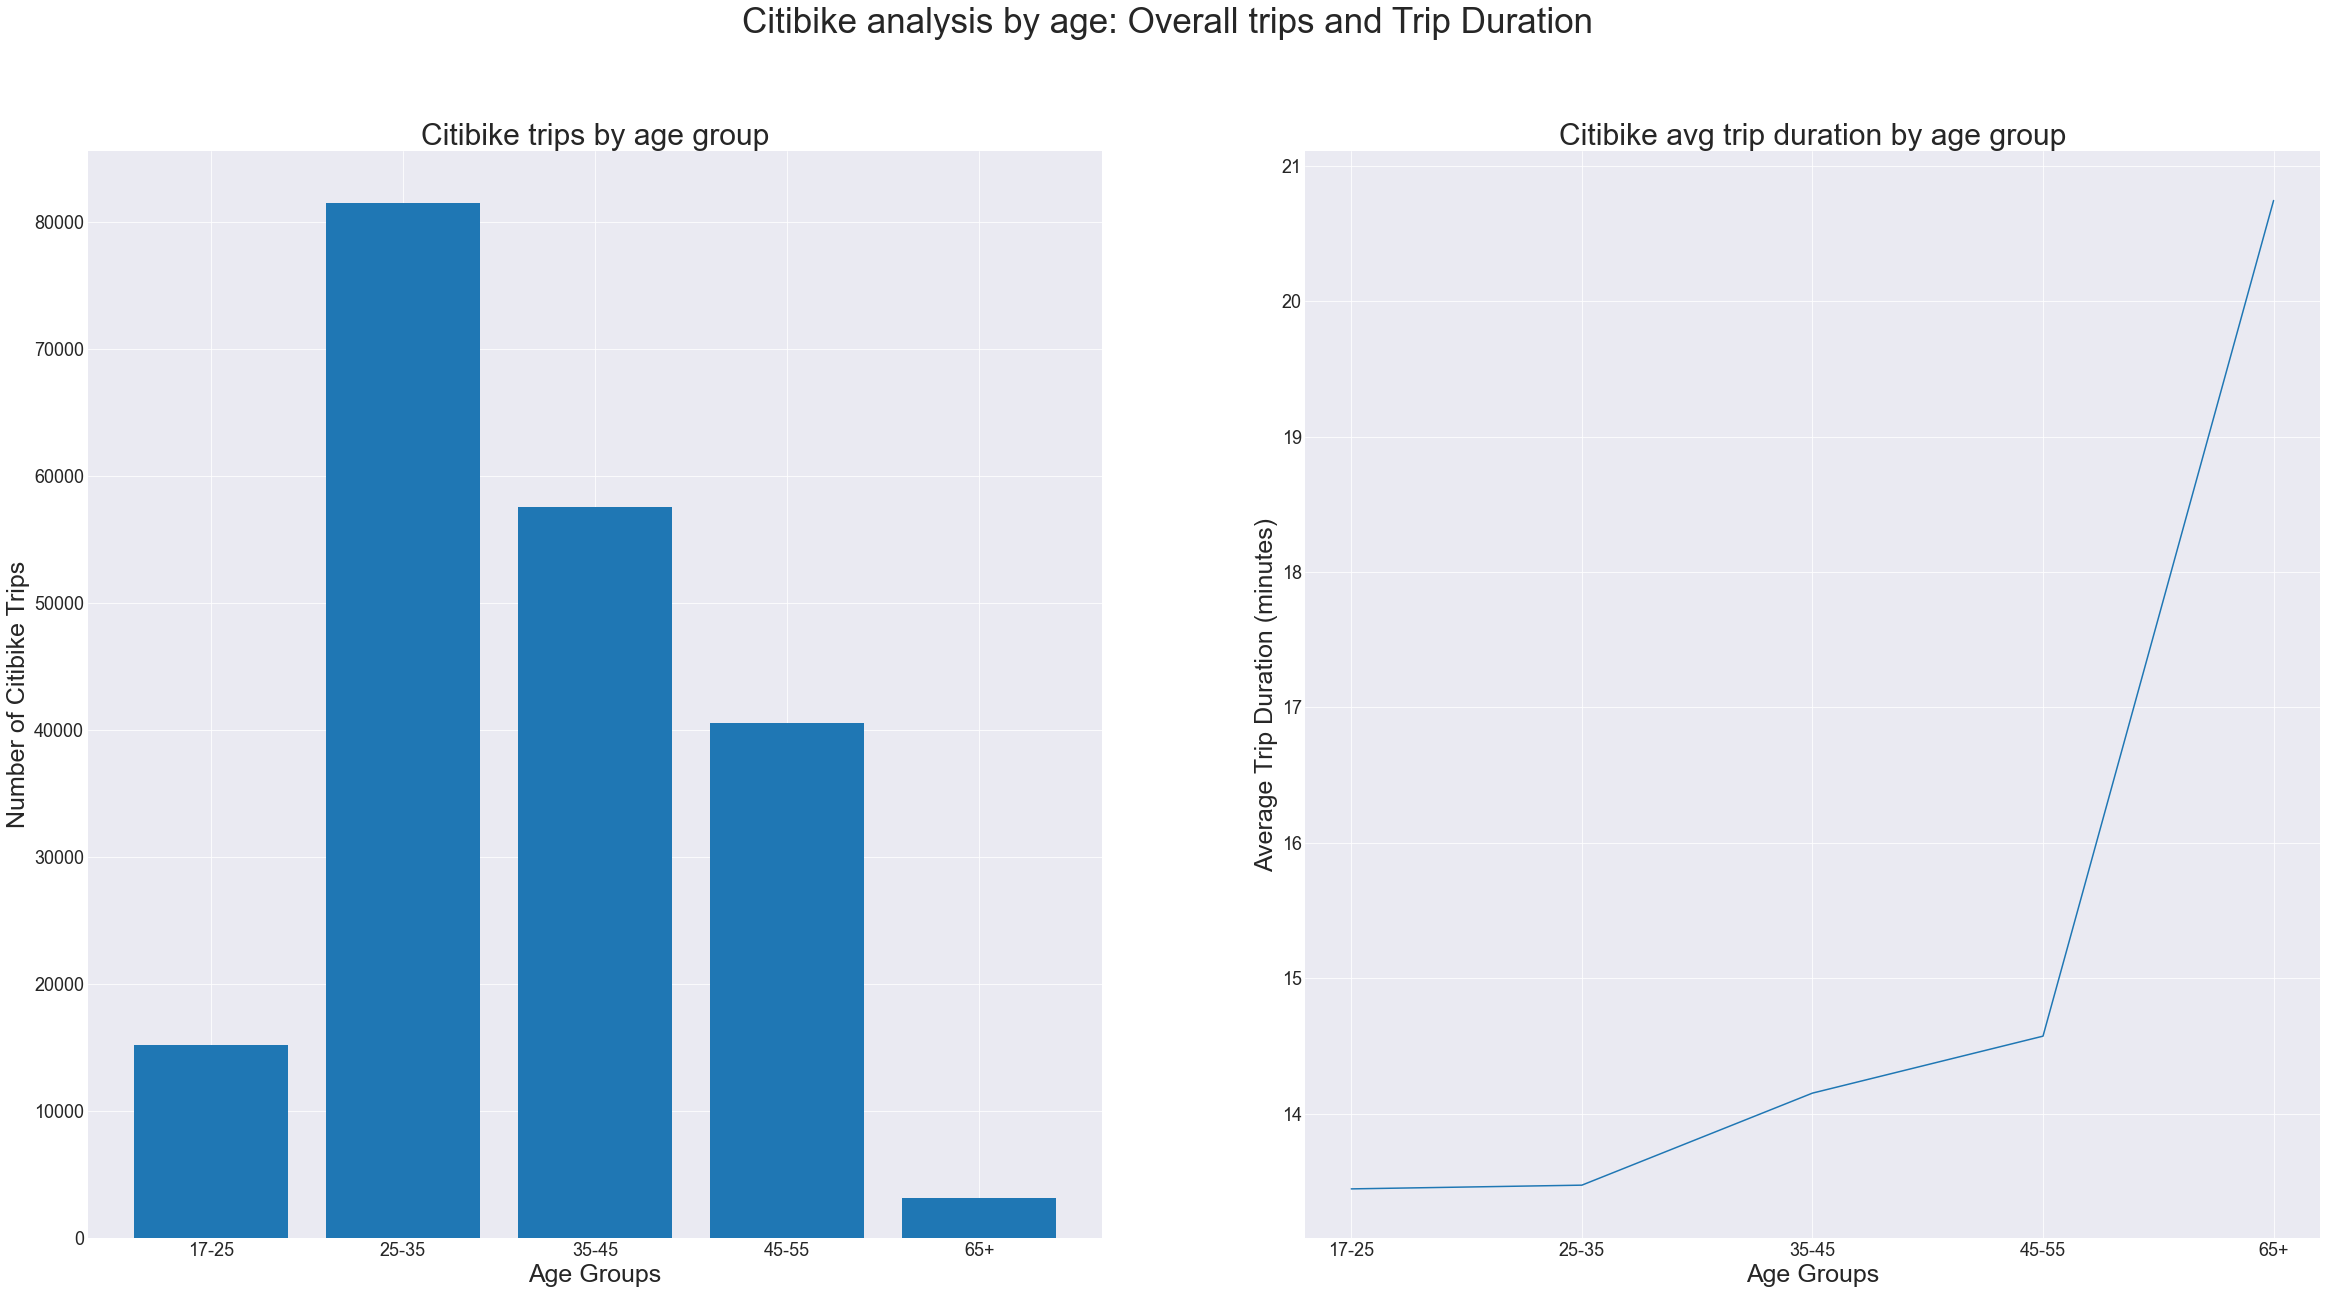

In [81]:
#plot!
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(40,20))
fig1.suptitle('Citibike analysis by age: Overall trips and Trip Duration', fontsize=35)

x = (agegroups)
y = (num_trips_age)
ax1.bar(x,y)
ax1.set_title('Citibike trips by age group', fontsize = 30)
ax1.set_xlabel('Age Groups', fontsize=25)
ax1.set_ylabel('Number of Citibike Trips', fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

a = (agegroups)
b = (avg_time_minutes)
ax2.plot(a,b)
ax2.set_title('Citibike avg trip duration by age group', fontsize = 30)
ax2.set_xlabel('Age Groups', fontsize=25)
ax2.set_ylabel('Average Trip Duration (minutes)', fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

In [82]:
#done!